# AR, MA e ARMA

# Ajustando o modelo AR

In [1]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 13.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']

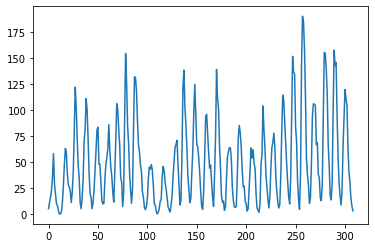

In [3]:
data.plot()

In [4]:
def AR_model_generation(ts, p):
    model = ARIMA(ts, order = [p, 0, 0])
    model_fit = model.fit()
    return model_fit

In [5]:
AR_1 = AR_model_generation(data, 1)
AR_2 =  AR_model_generation(data, 2)

In [6]:
AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1406.585
Date:                Sat, 24 Sep 2022   AIC                           2819.169
Time:                        18:38:49   BIC                           2830.369
Sample:                             0   HQIC                          2823.647
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3963      9.949      4.865      0.000      28.897      67.895
ar.L1          0.8244      0.036     23.011      0.000       0.754       0.895
sigma2       524.5565     39.103     13.415      0.000     447.916     601.197
===================================================================================
Ljung-Box (L1) (Q):                 100.01   Jarque-Bera (JB):               135.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# KDE: Kernel Density estimation

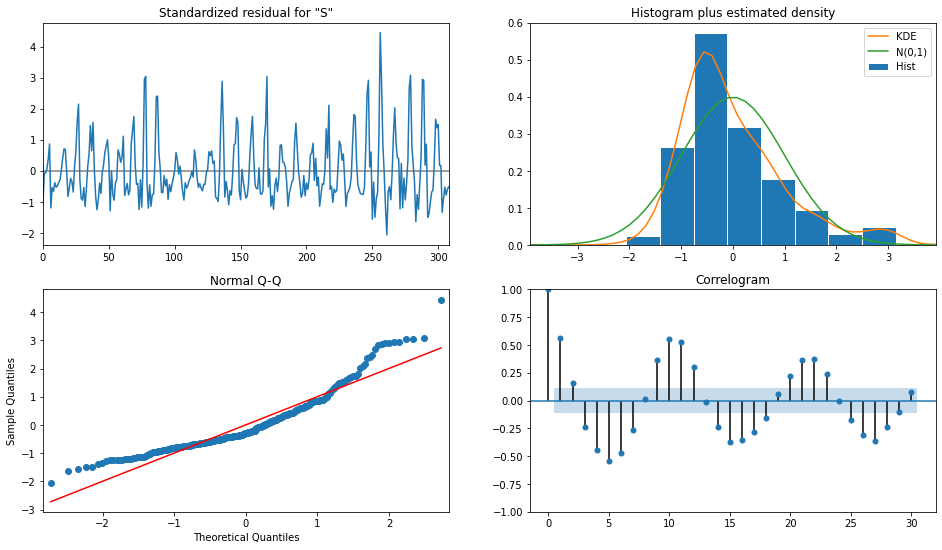

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))
fig = AR_1.plot_diagnostics(fig=fig, lags=30)

# AR(2)

In [9]:
AR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1307.319
Date:                Sat, 24 Sep 2022   AIC                           2622.637
Time:                        18:38:50   BIC                           2637.570
Sample:                             0   HQIC                          2628.607
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7462      3.938     12.631      0.000      42.027      57.465
ar.L1          1.3906      0.037     37.694      0.000       1.318       1.463
ar.L2         -0.6886      0.036    -19.363      0.000      -0.758      -0.619
sigma2       274.7272     18.897     14.538      0.000     237.689     311.765
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                80.38
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

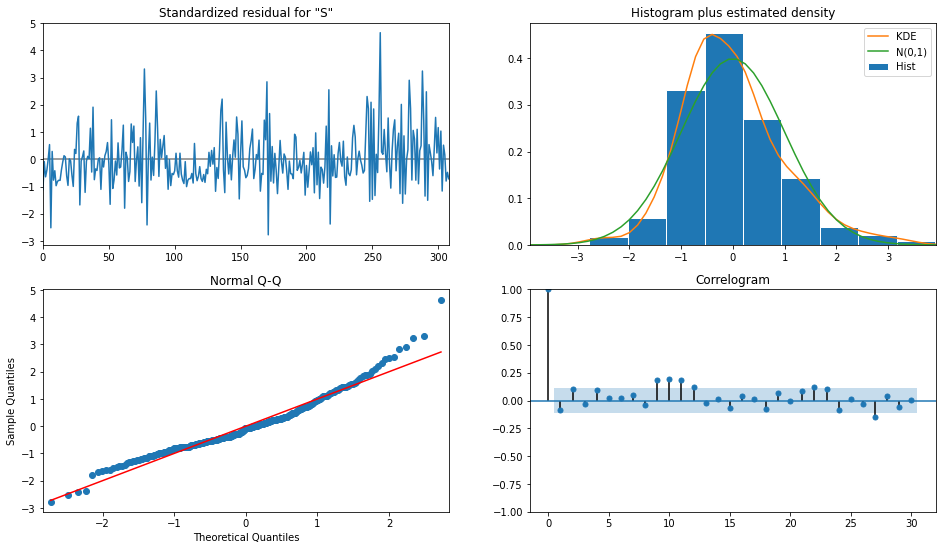

In [10]:
fig_2 = plt.figure(figsize=(16,9))
fig_final = AR_2.plot_diagnostics(fig=fig_2, lags=30)

# Moving Average Model

In [11]:
def MA_model_generation(ts, q):
    model = ARIMA(ts, order = [0, 0, q])
    model_fit = model.fit()
    return model_fit

In [12]:
MA_1 = MA_model_generation(data, 1)
MA_2 = MA_model_generation(data, 2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [13]:
MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1440.450
Date:                Sat, 24 Sep 2022   AIC                           2886.901
Time:                        18:38:52   BIC                           2898.101
Sample:                             0   HQIC                          2891.378
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6028      3.281     15.118      0.000      43.172      56.034
ma.L1          0.8134      0.028     28.719      0.000       0.758       0.869
sigma2       653.2738     58.358     11.194      0.000     538.895     767.653
===================================================================================
Ljung-Box (L1) (Q):                  82.26   Jarque-Bera (JB):                39.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
MA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1358.404
Date:                Sat, 24 Sep 2022   AIC                           2724.809
Time:                        18:38:52   BIC                           2739.742
Sample:                             0   HQIC                          2730.779
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5110      4.038     12.260      0.000      41.596      57.426
ma.L1          1.1879      0.041     28.649      0.000       1.107       1.269
ma.L2          0.6846      0.041     16.861      0.000       0.605       0.764
sigma2       383.0131     29.973     12.778      0.000     324.266     441.760
===================================================================================
Ljung-Box (L1) (Q):                  18.89   Jarque-Bera (JB):                69.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

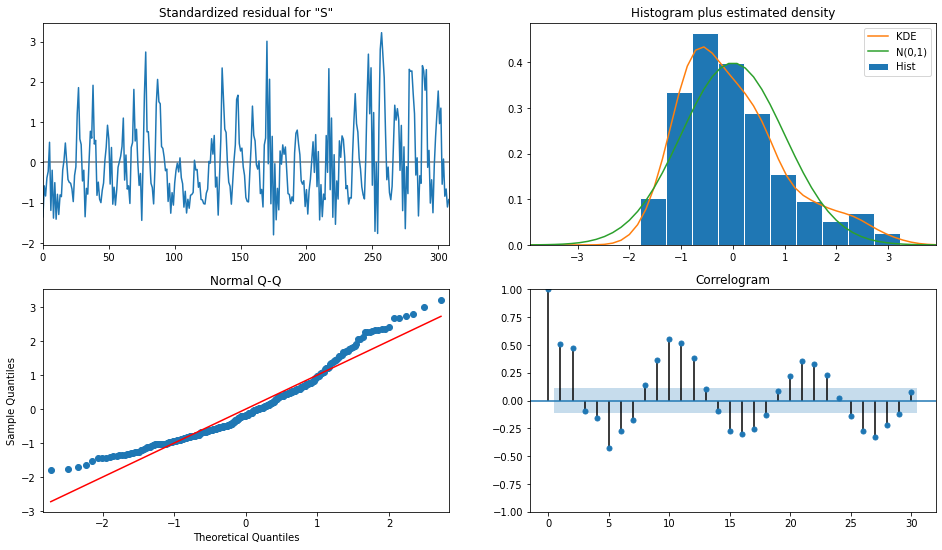

In [15]:
fig_1 = plt.figure(figsize=(16,9))
fig_1 = MA_1.plot_diagnostics(fig=fig_1, lags=30)

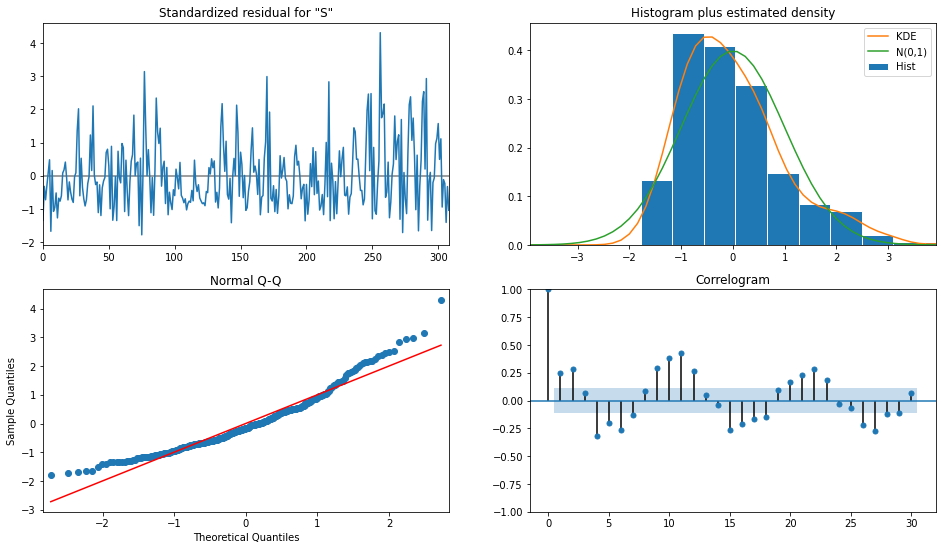

In [16]:
fig_2 = plt.figure(figsize=(16,9))
fig_2 = MA_2.plot_diagnostics(fig=fig_2, lags=30)

# ARMA model

In [17]:
def ARMA_model_generation(ts, p, q):
    model = ARIMA(ts, order = [p, 0, q])
    model_fit = model.fit()
    return model_fit

In [18]:
ARMA_1_1 = ARMA_model_generation(data, 1, 1)
ARMA_2_2 = ARMA_model_generation(data, 2, 2)

In [19]:
ARMA_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1352.613
Date:                Sat, 24 Sep 2022   AIC                           2713.226
Time:                        18:38:54   BIC                           2728.160
Sample:                             0   HQIC                          2719.197
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7921      8.077      6.041      0.000      32.962      64.623
ar.L1          0.7355      0.046     15.921      0.000       0.645       0.826
ma.L1          0.5194      0.048     10.798      0.000       0.425       0.614
sigma2       369.1788     25.783     14.319      0.000     318.646     419.712
===================================================================================
Ljung-Box (L1) (Q):                   9.89   Jarque-Bera (JB):                73.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
ARMA_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1304.436
Date:                Sat, 24 Sep 2022   AIC                           2620.873
Time:                        18:38:54   BIC                           2643.273
Sample:                             0   HQIC                          2629.828
                                - 309                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7502      3.667     13.567      0.000      42.563      56.938
ar.L1          1.4460      0.077     18.755      0.000       1.295       1.597
ar.L2         -0.7458      0.064    -11.681      0.000      -0.871      -0.621
ma.L1         -0.1405      0.097     -1.447      0.148      -0.331       0.050
ma.L2          0.0691      0.079      0.874      0.382      -0.086       0.224
sigma2       269.5971     18.567     14.520      0.000     233.207     305.988
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               102.49
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.91
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

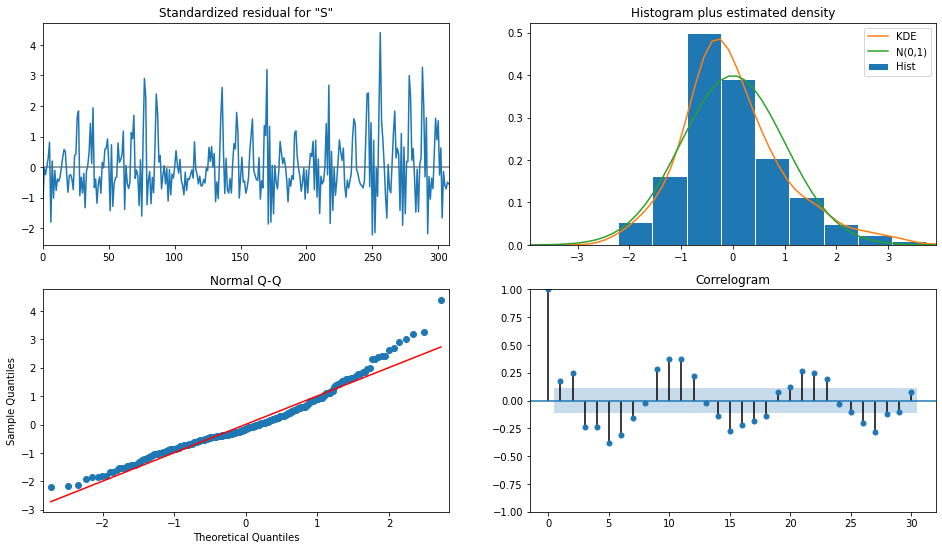

In [21]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_1_1.plot_diagnostics(fig=fig, lags=30)

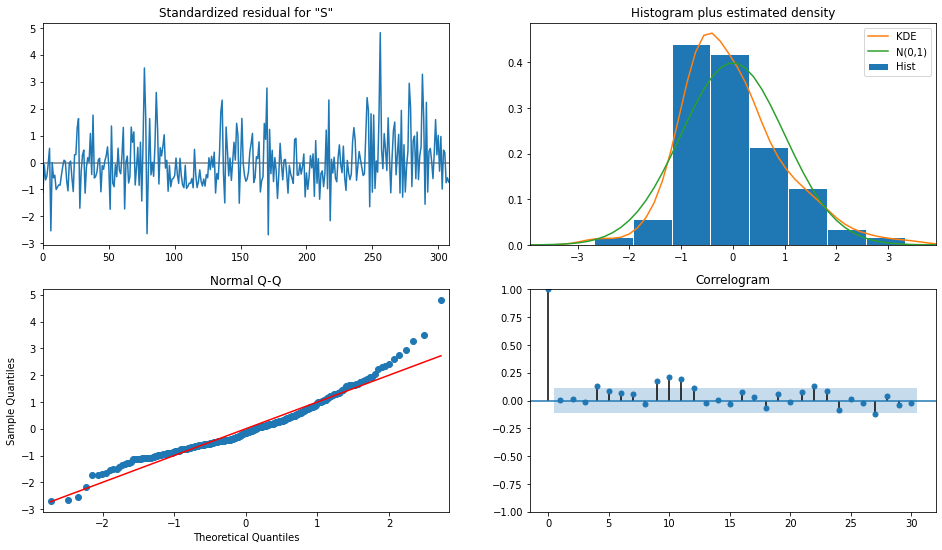

In [22]:
fig = plt.figure(figsize=(16,9))
fig = ARMA_2_2.plot_diagnostics(fig=fig, lags=30)